## 1. Análisis exploratorio de datos (EDA)

Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.

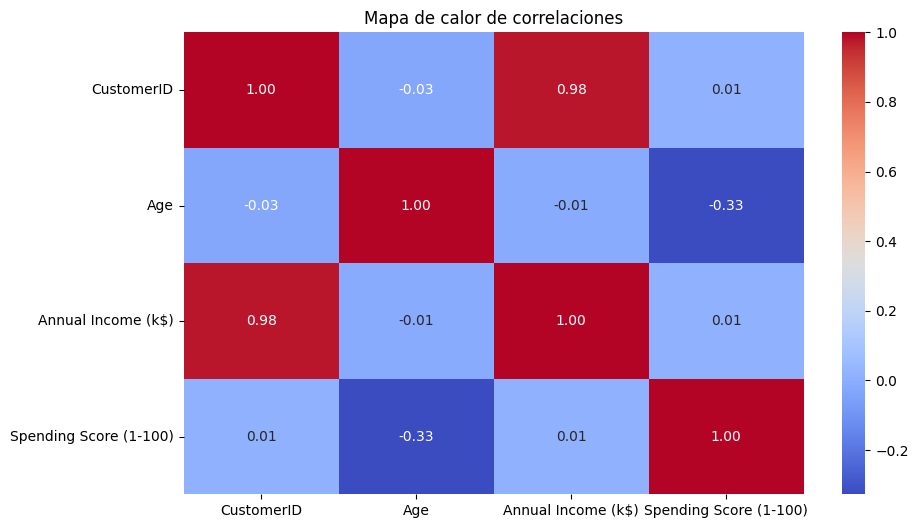

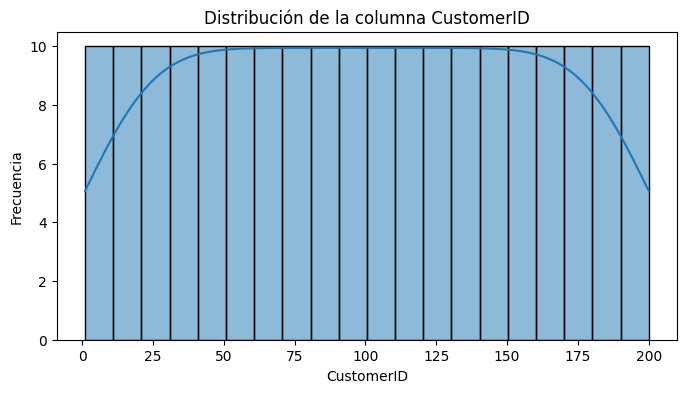

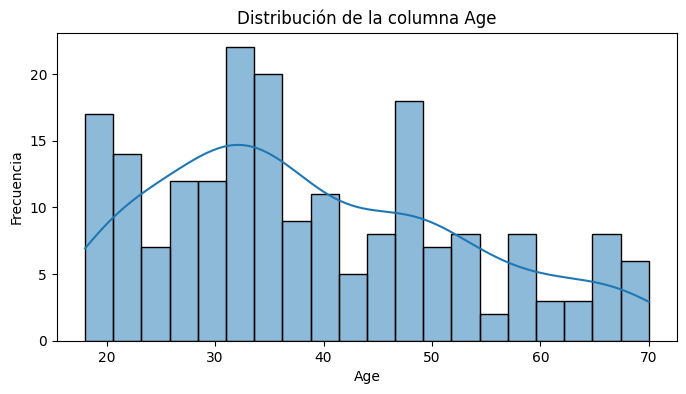

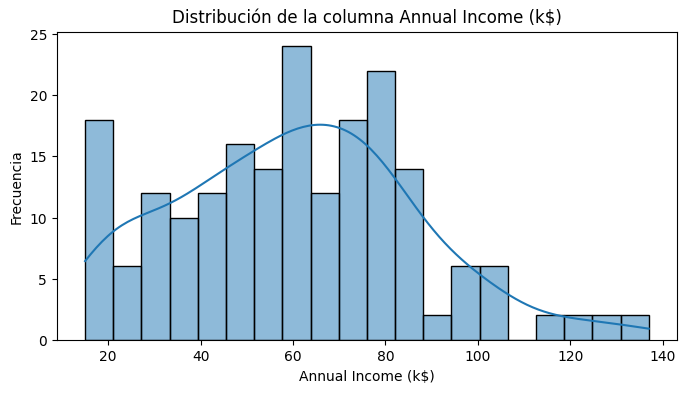

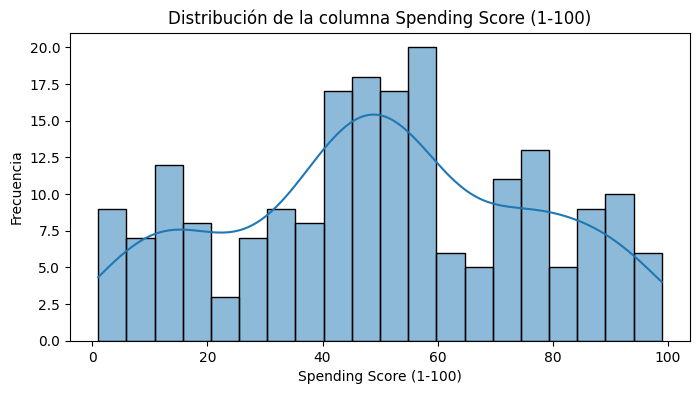

In [3]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = 'Mall_Customers.csv'  # Reemplazar con la ruta de tu archivo
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Información general del dataset
print("\nInformación general del dataset:")
print(data.info())

# Descripción estadística de las variables numéricas
print("\nDescripción estadística:")
print(data.describe())

# Visualizar valores nulos
print("\nValores nulos:")
print(data.isnull().sum())

# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Análisis de correlación (solo columnas numéricas)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

# Análisis univariado para columnas numéricas
for col in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_data[col], kde=True, bins=20)
    plt.title(f"Distribución de la columna {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


## 2. Preprocesamiento de datos

In [4]:
# Identificar y manejar valores nulos
print("Valores nulos antes de limpieza:")
print(data.isnull().sum())

# Si hay valores nulos, podemos rellenarlos o eliminarlos. Ejemplo:
# data.fillna(data.mean(), inplace=True)

# Para este ejemplo, asumimos que no hay valores nulos y que las columnas relevantes son numéricas.
# Seleccionar únicamente las columnas numéricas para clustering
numerical_data = data.select_dtypes(include=[np.number])

# Escalar los datos para normalizarlos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

print("\nDatos escalados (primeras filas):")
print(scaled_data[:5])


Valores nulos antes de limpieza:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Datos escalados (primeras filas):
[[-1.7234121  -1.42456879 -1.73899919 -0.43480148]
 [-1.70609137 -1.28103541 -1.73899919  1.19570407]
 [-1.68877065 -1.3528021  -1.70082976 -1.71591298]
 [-1.67144992 -1.13750203 -1.70082976  1.04041783]
 [-1.6541292  -0.56336851 -1.66266033 -0.39597992]]


## 3. Selección de características relevantes

In [5]:
# Ver correlaciones para decidir características relevantes
print("Correlación entre variables:")
print(numerical_data.corr())

# Aquí, seleccionamos todas las columnas para el clustering
selected_features = scaled_data


Correlación entre variables:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


## 4. Entrenar el modelo

### 4.1 K-Means Clustering 

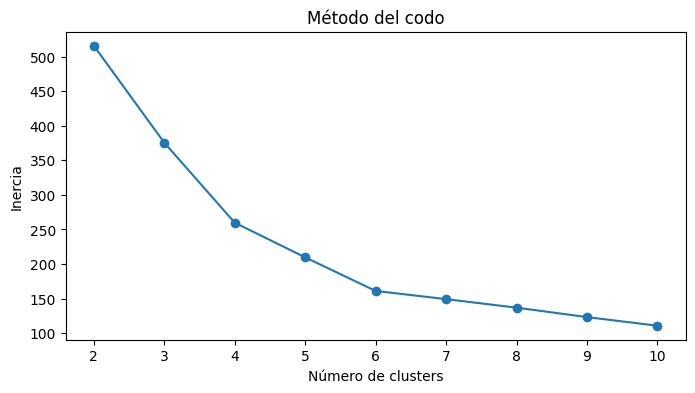

Centroides del modelo K-Means:
[[-0.53954057  1.14228648 -0.48195266 -0.32674814]
 [ 1.03142803 -0.43908961  0.95706585  1.1919166 ]
 [-0.86412801 -0.92585112 -0.83134311  0.30544014]
 [ 1.02668595  0.10226753  0.96816757 -1.18211652]]

Evaluación del modelo K-Means:
Coeficiente de Silhouette: 0.4140456252637291
Índice de Calinski-Harabasz: 135.9294683711798


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Encontrar el número óptimo de clusters usando el método del codo
inertia = []
silhouette_scores = range(2, 11)

for k in silhouette_scores:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

# Entrenar el modelo con el número óptimo de clusters (por ejemplo, 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(selected_features)

# Agregar los clusters al dataset original
data['KMeans_Cluster'] = clusters_kmeans

print("Centroides del modelo K-Means:")
print(kmeans.cluster_centers_)

# Evaluar el modelo
silhouette_avg = silhouette_score(selected_features, clusters_kmeans)
calinski_harabasz = calinski_harabasz_score(selected_features, clusters_kmeans)

print("\nEvaluación del modelo K-Means:")
print(f"Coeficiente de Silhouette: {silhouette_avg}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")


### 4.2 Hierarchical Clustering 

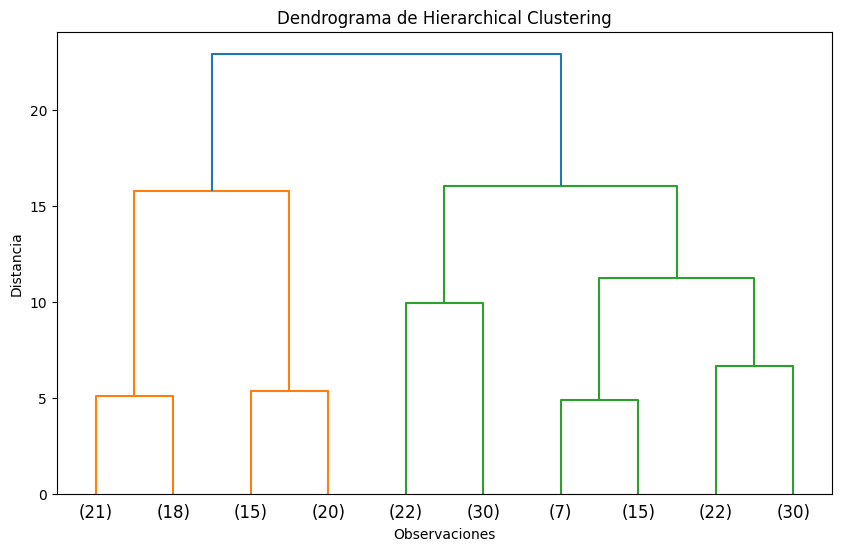


Evaluación del modelo Hierarchical Clustering:
Coeficiente de Silhouette: 0.39231254266034143
Índice de Calinski-Harabasz: 119.44498361793892


In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Calcular la matriz de linkage
linkage_matrix = linkage(selected_features, method='ward')

# Dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
plt.title("Dendrograma de Hierarchical Clustering")
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.show()

# Obtener clusters a partir del dendrograma (usando 4 clusters como ejemplo)
hierarchical_clusters = fcluster(linkage_matrix, t=4, criterion='maxclust')

# Agregar los clusters al dataset
data['Hierarchical_Cluster'] = hierarchical_clusters

# Evaluar el modelo
silhouette_avg_hier = silhouette_score(selected_features, hierarchical_clusters)
calinski_harabasz_hier = calinski_harabasz_score(selected_features, hierarchical_clusters)

print("\nEvaluación del modelo Hierarchical Clustering:")
print(f"Coeficiente de Silhouette: {silhouette_avg_hier}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz_hier}")


## 5. Visualización de resultados

### 5.1 Visualización de K-Means Clustering

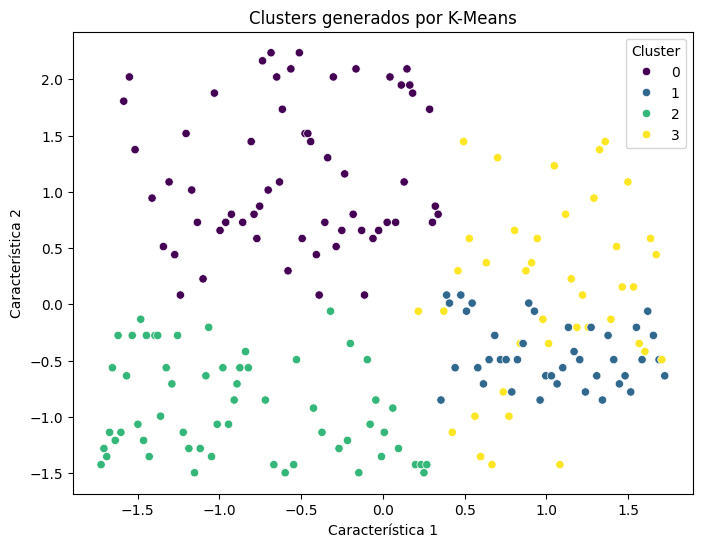

In [8]:
# Gráfico de dispersión para visualizar los clusters (usaremos las dos primeras dimensiones)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=selected_features[:, 0], y=selected_features[:, 1], hue=data['KMeans_Cluster'], palette='viridis')
plt.title("Clusters generados por K-Means")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend(title="Cluster")
plt.show()


### 5.2 Visualización de Hierarchical Clustering

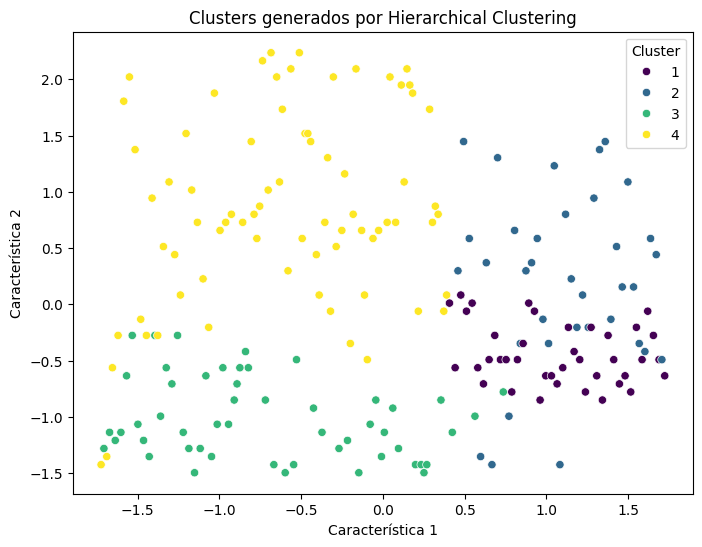

In [9]:
# Gráfico de dispersión para visualizar los clusters (usaremos las dos primeras dimensiones)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=selected_features[:, 0], y=selected_features[:, 1], hue=data['Hierarchical_Cluster'], palette='viridis')
plt.title("Clusters generados por Hierarchical Clustering")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend(title="Cluster")
plt.show()
